In [3]:
# 1. Importación de librerías
import pandas as pd
import json
import matplotlib.pyplot as plt  # para las gráficas

In [4]:
# 2. Carga de datos
with open('../testSpring.attacks.json', 'r') as f:
    data = json.load(f)

In [5]:
# 3. Creación del DataFrame
df = pd.json_normalize(data)

In [ ]:
# 4. Análisis exploratorio inicial
print("Primeras filas del DataFrame:")
print(df.head())

print("\nInformación general del DataFrame:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del DataFrame:
               ip  port protocol     os  \
0   36.16.227.141  3952      UDP  macOS   
1  205.227.72.227  2822     ICMP    iOS   
2   237.38.147.31  8740     ICMP    iOS   
3   191.27.70.151  6650      TCP  macOS   
4     71.8.70.175  7165     ICMP  macOS   

                                             payload                    tools  \
0  Error sed reiciendis tempora illo asperiores m...      [reboot, bandwidth]   
1                Vero aut nisi est aut autem libero.       [index, bandwidth]   
2                      Aut id doloremque quaerat ut.    [calculate, protocol]   
3  Tempore dolorem asperiores quam at perspiciati...     [override, protocol]   
4  Qui consequatur recusandae sunt consequatur no...  [compress, application]   

      behavior                          _class                  _id.$oid  \
0          DOS  com.example.demo.models.Attack  68a439d010fda0f44b75aa76   
1      SPYWARE  com.example.demo.models.Attack  68a439d010fda0f44b75aa77

In [7]:

# 5. Limpieza de datos
cols_a_eliminar = ['_id.$oid', '_class']
df = df.drop(columns=cols_a_eliminar, errors='ignore')

df['timestamp.$date'] = pd.to_datetime(df['timestamp.$date'], errors='coerce')

df = df.rename(columns={
    'timestamp.$date': 'timestamp',
    'geolocation.country': 'country',
    'geolocation.city': 'city'
})

df = df.dropna(subset=['ip', 'port', 'protocol', 'os', 'timestamp', 'behavior'])


In [8]:
# 6. Resultado final
print("\nDataFrame limpio:")
print(df.head())


DataFrame limpio:
               ip  port protocol     os  \
0   36.16.227.141  3952      UDP  macOS   
1  205.227.72.227  2822     ICMP    iOS   
2   237.38.147.31  8740     ICMP    iOS   
3   191.27.70.151  6650      TCP  macOS   
4     71.8.70.175  7165     ICMP  macOS   

                                             payload                    tools  \
0  Error sed reiciendis tempora illo asperiores m...      [reboot, bandwidth]   
1                Vero aut nisi est aut autem libero.       [index, bandwidth]   
2                      Aut id doloremque quaerat ut.    [calculate, protocol]   
3  Tempore dolorem asperiores quam at perspiciati...     [override, protocol]   
4  Qui consequatur recusandae sunt consequatur no...  [compress, application]   

      behavior                        timestamp  \
0          DOS 2025-03-14 21:59:56.598000+00:00   
1      SPYWARE 2025-07-09 20:10:32.129000+00:00   
2  BRUTE_FORCE 2025-01-22 02:30:47.703000+00:00   
3          DOS 2025-07-29 22:52

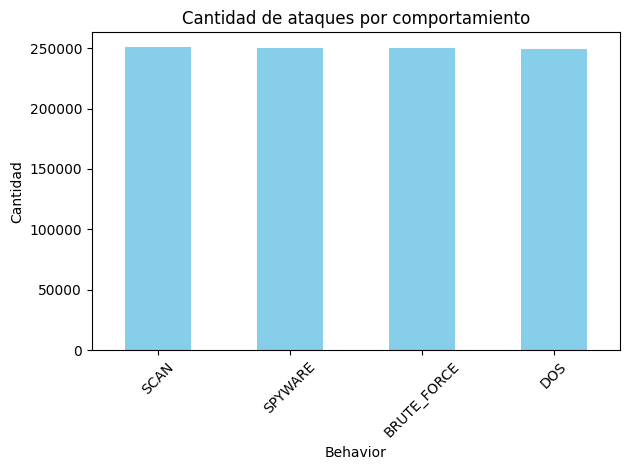

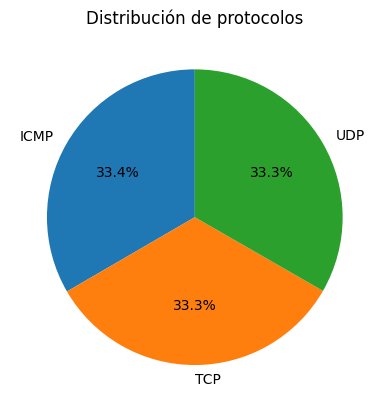

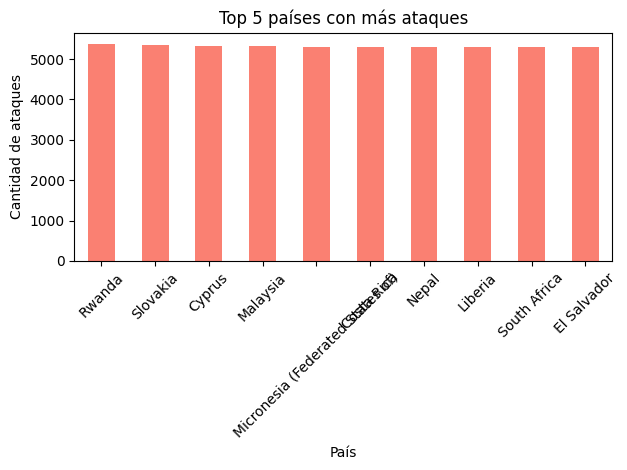

In [9]:

# 7. Gráficas

# 7.1 Cantidad de ataques por comportamiento
df['behavior'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de ataques por comportamiento')
plt.xlabel('Behavior')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7.2 Distribución de protocolos
df['protocol'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de protocolos')
plt.ylabel('')
plt.show()

# 7.3 Top 5 países con más ataques
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='salmon')
plt.title('Top 5 países con más ataques')
plt.xlabel('País')
plt.ylabel('Cantidad de ataques')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Guardar el DataFrame limpio en un archivo JSON
df.to_json("../ataques_limpios.json", orient="records", indent=4)
